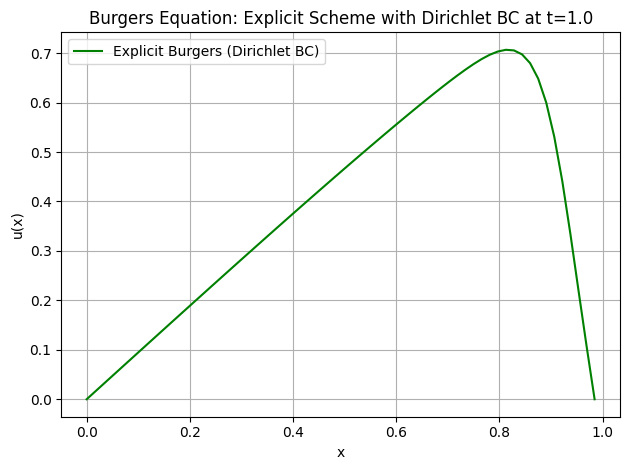

In [3]:
# Classical Burgers' equation solver (viscous, explicit + Dirichlet BC)
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 64
x = np.linspace(0, 1, N, endpoint=False)
dx = x[1] - x[0]
dt = 0.0001
t_tot = 1.0
nt = int(t_tot / dt)
nu = 0.01  # viscosity

# Step function initial condition
u0 = np.where(x <= 0.5, 1.0, 0.0)
u = u0.copy()

# Time evolution loop
for n in range(nt):
    un = u.copy()

    # Explicit scheme (Forward Euler)
    u[1:-1] = (un[1:-1]
               - un[1:-1] * dt/dx * (un[1:-1] - un[:-2])
               + nu * dt/dx**2 * (un[2:] - 2*un[1:-1] + un[:-2]))

    # Apply Dirichlet boundary conditions
    u[0] = 0.0
    u[-1] = 0.0

# Plot
plt.plot(x, u, label="Explicit Burgers (Dirichlet BC)", color='green')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.title('Burgers Equation: Explicit Scheme with Dirichlet BC at t=1.0')
plt.grid(True)
plt.tight_layout()
plt.show()


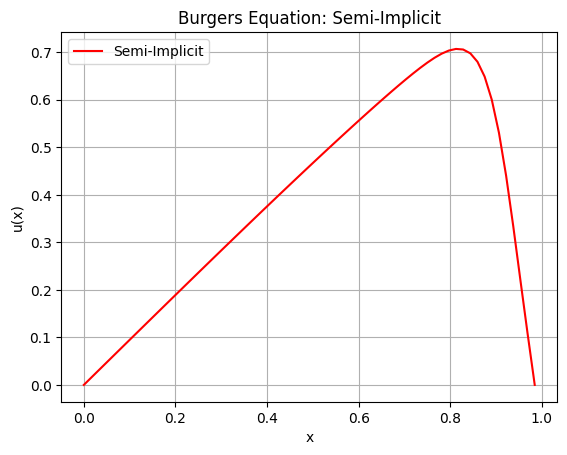

In [5]:
# Classical Burgers' equation solver (viscous, semi implicit + Dirichlet BC)
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve_banded

# Parameters
N = 64
x = np.linspace(0, 1, N, endpoint=False)
dx = x[1] - x[0]
dt = 0.0001
t_tot = 1.0
nt = int(t_tot / dt)
nu = 0.01  # viscosity

# Initial condition: step function
u = np.where(x <= 0.5, 1.0, 0.0)

# Diffusion coefficient
alpha = nu * dt / dx**2

# Construct tridiagonal system for implicit diffusion
lower = -alpha * np.ones(N-1)
main  = (1 + 2*alpha) * np.ones(N)
upper = -alpha * np.ones(N-1)

# Convert to banded format for scipy.linalg.solve_banded
ab = np.zeros((3, N))
ab[0, 1:] = upper
ab[1, :]  = main
ab[2, :-1] = lower

# Time evolution loop
for n in range(nt):
    un = u.copy()

    # Explicit convection: backward difference
    convection = un.copy()
    convection[1:] = un[1:] - dt/dx * un[1:] * (un[1:] - un[:-1])
    convection[0] = 0.0  # enforce Dirichlet BC

    # Solve implicit diffusion step
    u_new = solve_banded((1,1), ab, convection)

    # Apply Dirichlet boundary conditions explicitly
    u_new[0] = 0.0
    u_new[-1] = 0.0

    u = u_new

# Plot
plt.plot(x, u, label="Semi-Implicit", color='red')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Burgers Equation: Semi-Implicit')
plt.grid(True)
plt.legend()
plt.show()
